In [27]:
import datetime
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import fix_yahoo_finance as yf
start = datetime.datetime(2014,1,2)
end = datetime.datetime.today()
##3D Printing
print_df = web.DataReader(['DDDX', 'XYF'],'yahoo', start,end)['Close']
##Alternative Energy Message Boards
aem_df = web.DataReader(['MNGA', 'CPST'],'yahoo', start,end)['Close']
##Automotive and Transportation Message Boards
atm_df = web.DataReader(['TSLA', 'FNHI'],'yahoo', start,end)['Close']


In [32]:
print_df.head()

Symbols,DDDX,XYF
Date,,
2014-01-02,0.50,NaN
2014-01-03,0.79,NaN
2014-01-06,0.55,NaN
2014-01-07,0.79,NaN
2014-01-08,0.78,NaN


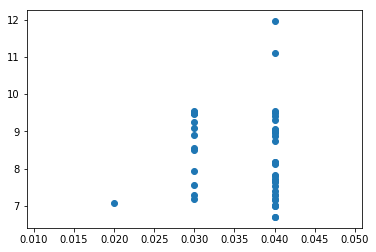

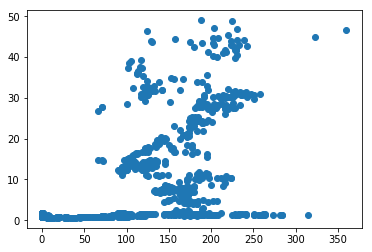

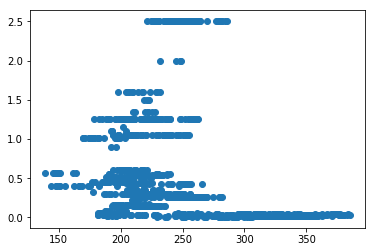

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(print_df.DDDX,print_df.XYF)
plt.show()
plt.figure()
plt.scatter(aem_df.MNGA,aem_df.CPST)
plt.show()
plt.figure()
plt.scatter(atm_df.TSLA,atm_df.FNHI)
plt.show()
plt.figure()

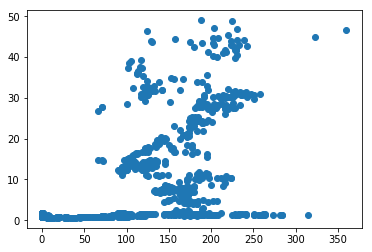

In [37]:
plt.scatter(aem_df.MNGA,aem_df.CPST)

In [55]:
import pandas as pd
import numpy as np
import pandas_datareader as data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [51]:
def get_prices(tickers,start):
    prices = web.DataReader(tickers,'yahoo',start=start)['Adj Close']
    return prices

In [83]:
from pandas_datareader import data

In [85]:
df = pd.read_csv('stock_price_list.csv',delimiter='\t')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df=df.set_index('Date')

In [90]:
df = df.dropna(axis=1,how='any')
df.head()

,AAPL,AMFE,AVEO,CEI,COOP,CRMD,CSRH,CTL,CVM,CVS,...,MSMY,NULGF,NVDA,ORC,RIBT,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,79.018570,0.0095,1.80,612.50,34.439999,1.36,0.009,31.65,16.25,70.400002,...,0.0002,0.107,15.860000,13.23,5.19,0.71,0.73,99.500000,0.0609,197.940002
2014-01-03,77.282860,0.0090,1.85,612.50,35.280003,1.49,0.009,31.60,16.25,70.550003,...,0.0002,0.107,15.670000,13.39,5.48,0.78,0.77,99.500000,0.0650,196.000000
2014-01-06,77.704285,0.0090,1.80,618.75,33.000000,1.46,0.009,31.67,17.25,69.309998,...,0.0002,0.100,15.880000,13.42,5.34,0.76,0.75,99.570000,0.0640,195.860001
2014-01-07,77.148575,0.0090,1.78,618.75,32.280003,1.50,0.009,31.41,18.25,69.669998,...,0.0002,0.099,16.139999,13.23,5.66,0.77,0.85,98.650002,0.0630,201.509995
2014-01-08,77.637146,0.0095,1.78,625.00,32.160000,1.60,0.009,31.24,17.00,69.769997,...,0.0002,0.099,16.360001,13.38,5.59,0.81,0.85,98.449997,0.0600,205.289993


In [91]:
returns = (((df.iloc[-1] / df.iloc[0]) - 1) * 100).round(2)

In [93]:
symbol = ((np.asarray(returns.index)).reshape(3,9))
 
#create a reshaped array of percent returns that matches the desired shape of the heatmap
per_change = ((np.asarray(returns)).reshape(3,9))
 
#create a new array of the same shape as desired, combining the relevant ticker symbol
#and percentage return data
labels = (np.asarray(["{0} \n {1:.3f}".format(symbol, per_change)
                      for symbol, per_change in zip(symbol.flatten(),
                                               per_change.flatten())])).reshape(3,9)

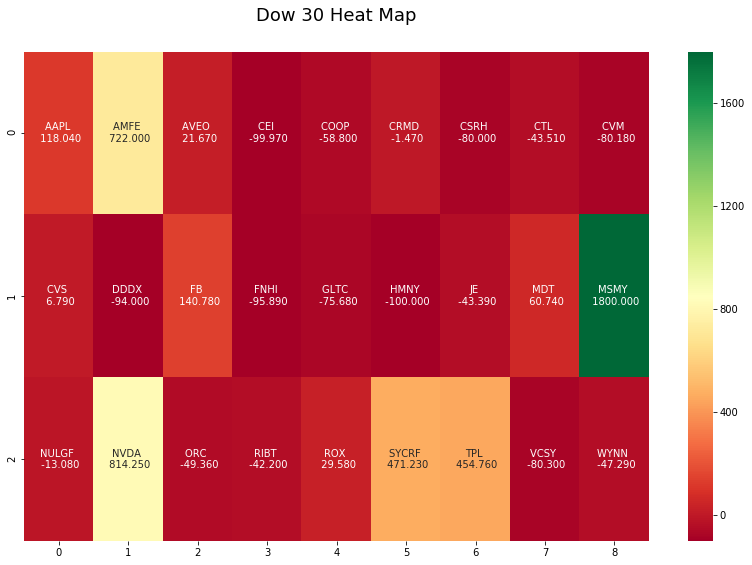

In [94]:

fig, ax = plt.subplots(figsize=(14,9))
plt.title('Dow 30 Heat Map',fontsize=18)
ax.title.set_position([0.5,1.05])
ax.set_xticks([])
sns.heatmap(per_change, annot=labels, fmt="", cmap='RdYlGn', ax=ax)
plt.show()